In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials())
from pprint import pprint
import os
import matplotlib.pyplot as plt
import scipy.stats as st
from mpl_toolkits.axes_grid1 import host_subplot
from sklearn import linear_model
import seaborn as sns
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm


In [2]:
# Reading artist_df
artist_data_file = os.path.join("Artistfile.csv")
artist_df= pd.read_csv(artist_data_file)
artist_df.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16410055.0,"beatlesque,british invasion,classic rock,merse...",beatlesque
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8678847.0,"album rock,british invasion,classic rock,rock",album rock
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4220152.0,"album rock,classic rock,country rock,folk,folk...",album rock
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5524310.0,"album rock,art rock,classic rock,dance rock,gl...",album rock
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9060576.0,"album rock,classic rock,hard rock,rock",album rock


In [3]:
#reading tracks_df
tracks_data_file = os.path.join("Trackfile.csv")
tracks_df= pd.read_csv(tracks_data_file)
tracks_df.head()

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207


Trying to find relationships between tracks audio features

In [4]:
# Grouping by Artist id
grouped_tracks= tracks_df.groupby("Artist ID")

# Aggregating a DataFrame grouped_tracks with feature's means
audio_analysis = grouped_tracks.agg(Danceability= pd.NamedAgg(column="Danceability", aggfunc="mean"),Energy=pd.NamedAgg(column="Energy", aggfunc="mean"),
                                     Valence=pd.NamedAgg(column="Valence", aggfunc="mean"),Instrumentalness=pd.NamedAgg(column="Instrumentalness", aggfunc="mean"),
                                   Loudness=pd.NamedAgg(column="Loudness", aggfunc="mean"),Tempo=pd.NamedAgg(column="Tempo", aggfunc="mean"),
                                   Speechiness=pd.NamedAgg(column="Speechiness", aggfunc="mean"),Popularity=pd.NamedAgg(column="Popularity", aggfunc="mean"))
                                                          
audio_analysis                                                                                                      

,Danceability,Energy,Valence,Instrumentalness,Loudness,Tempo,Speechiness,Popularity
Artist ID,,,,,,,,
00tVTdpEhQQw1bqdu8RCx2,0.432222,0.727111,0.515556,0.006895,-9.191889,131.106111,0.04900,56.222222
01C9OoXDvCKkGcf735Tcfo,0.526000,0.402222,0.623556,0.155163,-14.830667,110.688222,0.04700,47.777778
02DWGcShQivFepRvGJ7xhB,0.860000,0.545000,0.623000,0.699000,-13.852000,121.010000,0.06590,22.000000
02NfyD6AlLA12crYzw5YcR,0.402100,0.782100,0.344620,0.138367,-7.292300,99.442900,0.07178,50.200000
03YhcM6fxypfwckPCQV8pQ,0.540900,0.193880,0.376250,0.617540,-18.637900,118.559200,0.04494,41.500000
...,...,...,...,...,...,...,...,...
7xX15v6ahAkcT14kHfB9wB,0.642000,0.683000,0.584000,0.000000,-5.386000,154.881000,0.26200,72.000000
7xYxgSJaIf7yOFLmknYX38,0.453444,0.684000,0.575333,0.239686,-7.439000,132.914556,0.05090,37.111111
7yk35uHNQclPXFGFoTU44w,0.793400,0.751000,0.697700,0.000149,-7.294400,97.317800,0.26030,53.100000


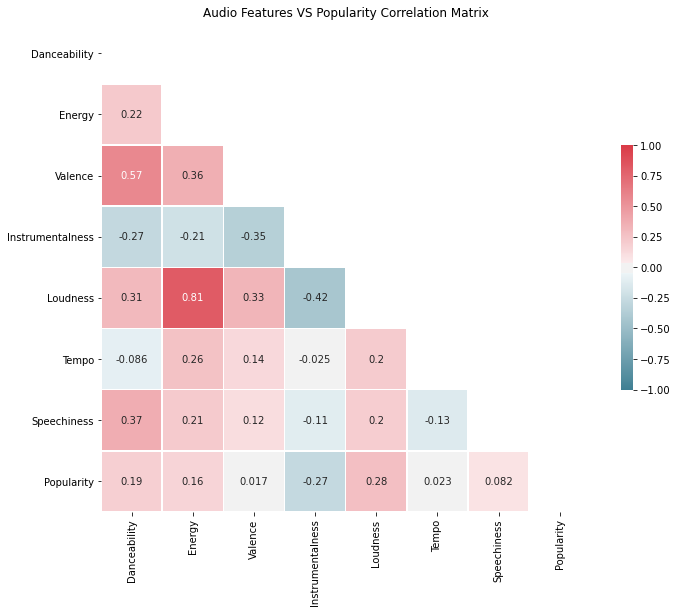

In [5]:
audio_corr= audio_analysis.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(audio_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(audio_corr,mask=mask, cmap=cmap,vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True,)
plt.title('Audio Features VS Popularity Correlation Matrix')
plt.show()

In [37]:
# Defining a linear regression function improve the code efficency
def regression(x,y):  
    (slope,intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
    regress_values= x*slope+intercept
    line_eq= "y=" + str(round(slope,3)) + "x+" + str(round(intercept,2))
    r_squared= rvalue**2
    return regress_values,line_eq,r_squared

Danceability VS Energy

The r-squared is : 0.05021580725057271


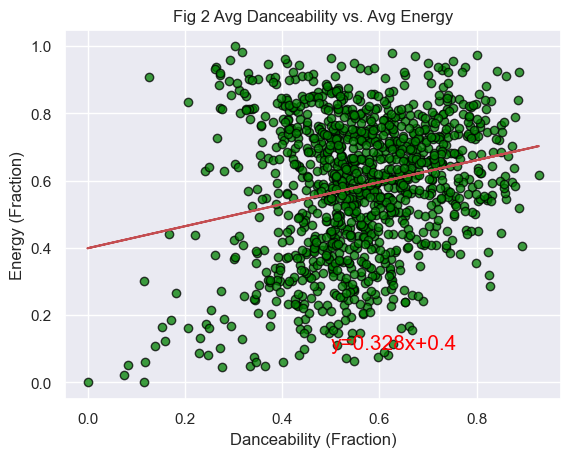

In [38]:
sns.set(color_codes=True)
#Plotting scatter chart, line curve, line equation
danceability_energy= regression(audio_analysis["Danceability"], audio_analysis["Energy"])
plt.scatter(audio_analysis["Danceability"],audio_analysis["Energy"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Danceability"],danceability_energy[0],"r-")
#Printing the line equation
plt.annotate(danceability_energy[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Danceability (Fraction)")
plt.ylabel("Energy (Fraction)")
plt.title("Fig 2 Avg Danceability vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {danceability_energy[2]}")
#saving plot as "png" file
plt.savefig("Fig2.png")
plt.show()

Valence VS Energy

The r-squared is : 0.13005339331930618


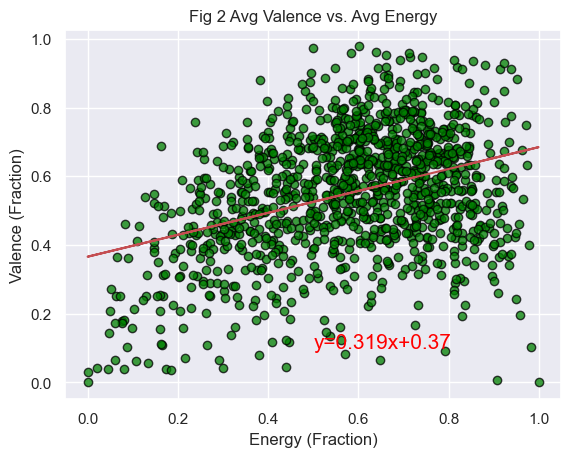

In [39]:
#Plotting scatter chart, line curve, line equation
energy_valence= regression(audio_analysis["Energy"], audio_analysis["Valence"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Valence"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_valence[0],"r-")
#Printing the line equation
plt.annotate(energy_valence[1],(0.5,0.1), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Valence (Fraction)")
plt.title("Fig 2 Avg Valence vs. Avg Energy")
#Printing r-squared factor
print(f"The r-squared is : {energy_valence[2]}")
#saving plot as "png" file
plt.savefig("Fig2.png")
plt.show()

Loudness VS Energy

The r-squared is : 0.6605830204582631


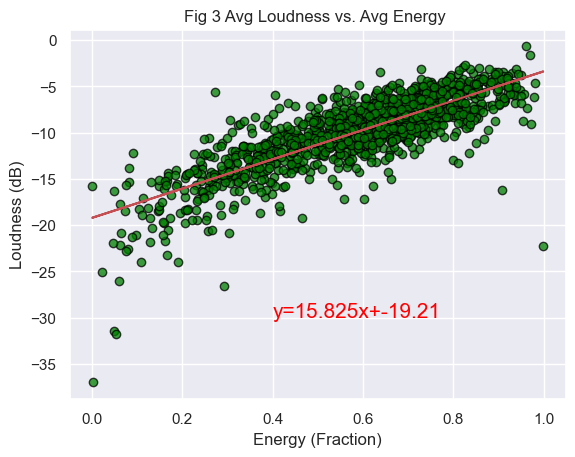

In [40]:
#Selected
#Plotting scatter chart, line curve, line equation
energy_loudness= regression(audio_analysis["Energy"], audio_analysis["Loudness"])
plt.scatter(audio_analysis["Energy"],audio_analysis["Loudness"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Energy"],energy_loudness[0],"r-")
#Printing the line equation
plt.annotate(energy_loudness[1],(0.4,-30), fontsize=15, color="red")
plt.xlabel("Energy (Fraction)")
plt.ylabel("Loudness (dB)")
plt.title("Fig 3 Avg Loudness vs. Avg Energy ")
#Printing r-squared factor
print(f"The r-squared is : {energy_loudness[2]}")
#saving plot as "png" file
plt.savefig("Fig3.png")
plt.show()

Danceability VS Valence

The r-squared is : 0.32726553235009975


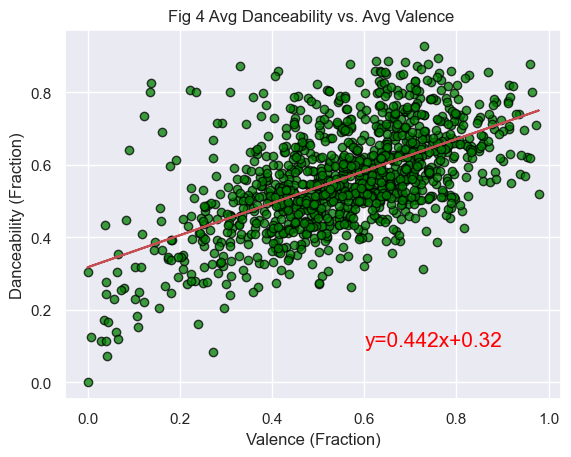

In [41]:
#Slected
#Plotting scatter chart, line curve, line equation
valence_danceability= regression(audio_analysis["Valence"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Valence"],audio_analysis["Danceability"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Valence"],valence_danceability[0],"r-")
#Printing the line equation
plt.annotate(valence_danceability[1],(0.6,0.1), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 4 Avg Danceability vs. Avg Valence ")
#Printing r-squared factor
print(f"The r-squared is : {valence_danceability[2]}")
#saving plot as "png" file
plt.savefig("Fig4.png")
plt.show()

Danceability VS Speechiness

The r-squared is : 0.13831563230010252


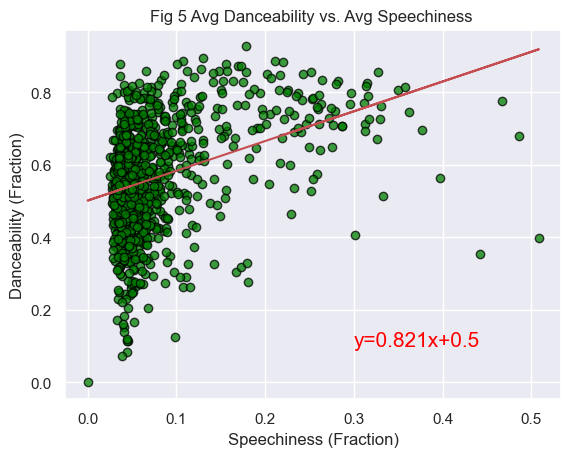

In [42]:
#Plotting scatter chart, line curve, line equation
speechiness_danceability= regression(audio_analysis["Speechiness"], audio_analysis["Danceability"])
plt.scatter(audio_analysis["Speechiness"],audio_analysis["Danceability"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(audio_analysis["Speechiness"],speechiness_danceability[0],"r-")
#Printing the line equation
plt.annotate(speechiness_danceability[1],(0.3,0.1), fontsize=15, color="red")
plt.xlabel("Speechiness (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 5 Avg Danceability vs. Avg Speechiness ")
#Printing r-squared factor
print(f"The r-squared is : {speechiness_danceability[2]}")
#saving plot as "png" file
plt.savefig("Fig5.png")
plt.show()

In [43]:
X = audio_analysis[['Danceability','Speechiness']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = audio_analysis['Popularity']

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     21.58
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           6.28e-10
Time:                        01:03:45   Log-Likelihood:                -4853.8
No. Observations:                1178   AIC:                             9714.
Df Residuals:                    1175   BIC:                             9729.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           34.0780      1.787     19.071   

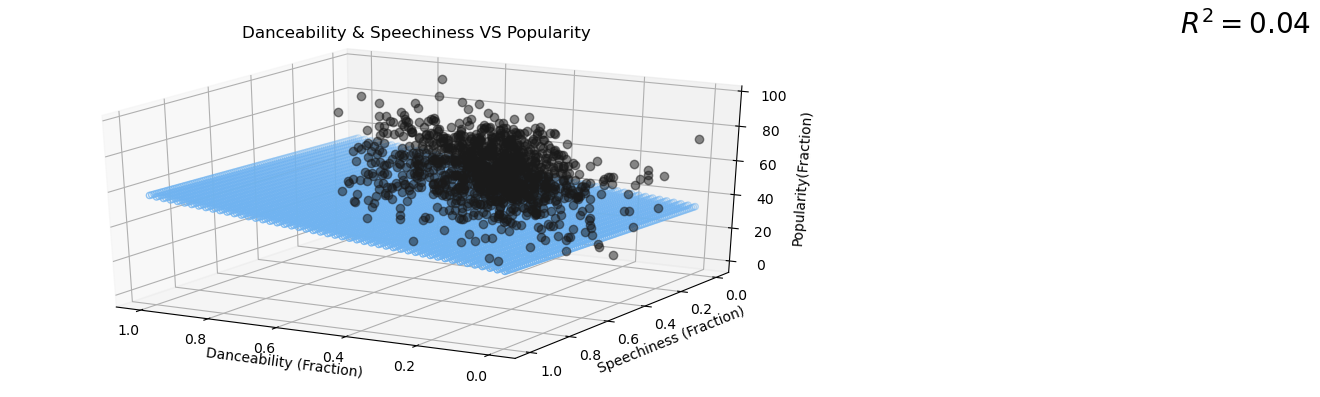

In [44]:
sns.set(color_codes=True)
X = audio_analysis[['Danceability','Speechiness']]
Y = audio_analysis['Popularity']

######################## Prepare model data point for visualization ###############################

x = audio_analysis['Danceability']
y = audio_analysis['Speechiness']
z = Y

x_pred = np.linspace(0, 1, 50)   # range of porosity values
y_pred = np.linspace(0, 1, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################# Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# ############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(25,4))

ax = fig.add_subplot(131, projection='3d')

ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Danceability (Fraction)', fontsize=10)
ax.set_ylabel('Speechiness (Fraction)', fontsize=10)
ax.set_zlabel('Popularity(Fraction)', fontsize=10)
ax.view_init(elev=25, azim=120)
ax.set_title("Danceability & Speechiness VS Popularity")
fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)
fig.tight_layout()

In [45]:
X2 = audio_analysis[['Energy','Loudness']] # here we have 2 variables for multiple regression.
Y2 = audio_analysis['Popularity'] 
# with statsmodels
X2 = sm.add_constant(X2) # adding a constant
 
model2 = sm.OLS(Y2, X2).fit()
predictions = model2.predict(X2) 
 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     57.05
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           2.25e-24
Time:                        01:03:47   Log-Likelihood:                -4820.5
No. Observations:                1178   AIC:                             9647.
Df Residuals:                    1175   BIC:                             9662.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.3267      3.685     18.812      0.0

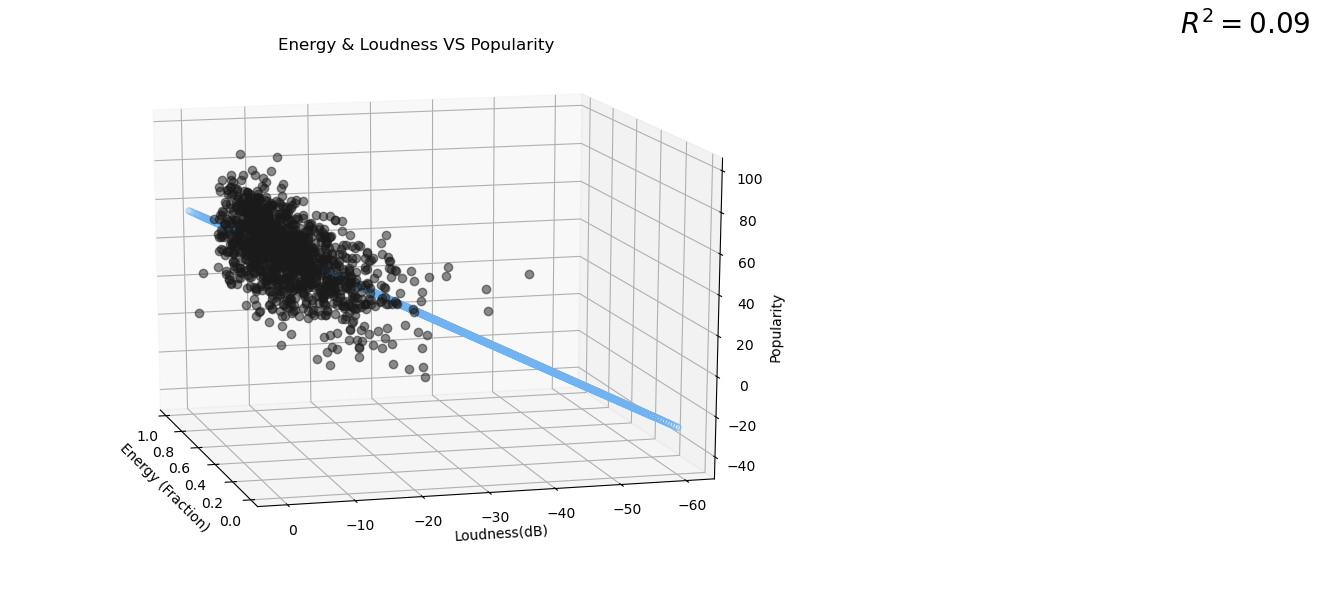

In [46]:
X2 = audio_analysis[['Energy','Loudness']]
Y2= audio_analysis['Popularity']

######################## Prepare model data point for visualization ###############################

x2 = audio_analysis['Energy']
y2 = audio_analysis['Loudness']
z2 = Y2

x2_pred = np.linspace(0, 1, 50)   # range of porosity values
y2_pred = np.linspace(-60, 0, 50)  # range of brittleness values
xx2_pred, yy2_pred = np.meshgrid(x2_pred, y2_pred)
model_viz2 = np.array([xx2_pred.flatten(), yy2_pred.flatten()]).T

################################################# Train #############################################

ols2 = linear_model.LinearRegression()
model2 = ols2.fit(X2, Y2)
predicted2 = model2.predict(model_viz2)

# ############################################## Evaluate ############################################

r2_2 = model2.score(X2, Y2)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(25, 6))

ax = fig.add_subplot(131, projection='3d')
ax.plot(x2, y2, z2, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(xx2_pred.flatten(), yy2_pred.flatten(), predicted2, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('Energy (Fraction)', fontsize=10)
ax.set_ylabel('Loudness(dB)', fontsize=10)
ax.set_zlabel('Popularity', fontsize=10)
ax.view_init(elev=15, azim=165)
ax.set_title("Energy & Loudness VS Popularity")
fig.suptitle('$R^2 = %.2f$' % r2_2, fontsize=20)
fig.tight_layout()

In [47]:
top_100_tracks= tracks_df.sort_values("Popularity", ascending= False)
top_100_tracks= tracks_df.head(100)
top_100_tracks

,Artist,Artist ID,Tracks,Track ID,Release Date,Track Duration,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Here Comes The Sun - Remastered 2009,6dGnYIeXmHdcikdzNNDMm2,1969-09-26,185733,83,0.557,0.540,9.0,-10.484,1.0,0.0347,0.0339,0.002480,0.1790,0.394,129.171
1,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Come Together - Remastered 2009,2EqlS6tkEnglzr7tkKAAYD,1969-09-26,259946,78,0.533,0.376,9.0,-11.913,0.0,0.0393,0.0302,0.248000,0.0926,0.187,165.007
2,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Let It Be - Remastered 2009,7iN1s7xHE4ifF5povM6A48,1970-05-08,243026,78,0.443,0.403,0.0,-8.339,1.0,0.0322,0.6310,0.000000,0.1110,0.410,143.462
3,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Yesterday - Remastered 2009,3BQHpFgAp4l80e1XslIjNI,1965-08-06,125666,77,0.332,0.179,5.0,-11.830,1.0,0.0326,0.8790,0.000000,0.0886,0.315,96.529
4,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,Hey Jude - Remastered 2015,0aym2LBJBk9DAYuHHutrIl,2000-11-13,425653,76,0.386,0.607,10.0,-7.700,1.0,0.0261,0.0112,0.000014,0.0880,0.532,147.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,The Wind Cries Mary,5H6Jp0syB5yEPk7SWYdlmk,1967-05-12,200733,64,0.499,0.495,5.0,-10.508,1.0,0.0501,0.3480,0.028600,0.2000,0.339,80.086
96,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Foxey Lady,23MrkN7g6Q5U7GLIxNHN1B,1967-05-12,198773,62,0.507,0.847,1.0,-5.987,0.0,0.0411,0.0751,0.237000,0.3720,0.566,98.096
97,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Castles Made of Sand,3qebSLgUwaEqbwCM5sj5Kh,1967-12-01,168920,62,0.461,0.714,11.0,-9.159,0.0,0.3130,0.5040,0.017100,0.6840,0.454,94.372
98,Jimi Hendrix,776Uo845nYHJpNaStv1Ds4,Crosstown Traffic,1ntxpzIUbSsizvuAy6lTYY,1968-10-25,146573,60,0.486,0.963,0.0,-5.586,0.0,0.1290,0.2480,0.000002,0.1580,0.533,113.133


The r-squared is : 0.11626514699520356


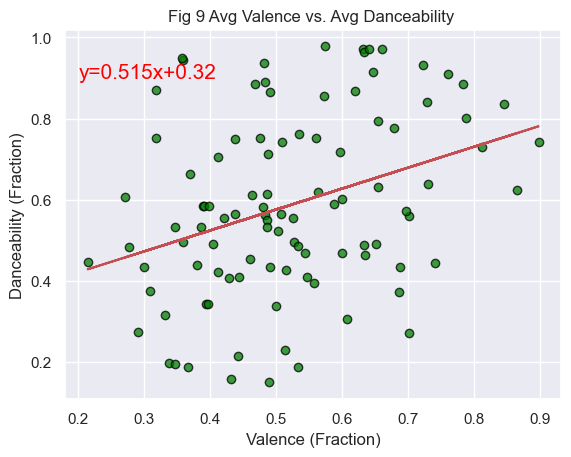

In [48]:
sns.set(color_codes=True)
#Plotting scatter chart, line curve, line equation
danceability_valence_100= regression(top_100_tracks["Danceability"], top_100_tracks["Valence"])
plt.scatter(top_100_tracks["Danceability"],top_100_tracks["Valence"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
plt.plot(top_100_tracks["Danceability"],danceability_valence_100[0],"r-")
#Printing the line equation
plt.annotate(danceability_valence_100[1],(0.2,0.9), fontsize=15, color="red")
plt.xlabel("Valence (Fraction)")
plt.ylabel("Danceability (Fraction)")
plt.title("Fig 9 Avg Valence vs. Avg Danceability ")
#Printing r-squared factor
print(f"The r-squared is : {danceability_valence_100[2]}")
#saving plot as "png" file
plt.savefig("Fig9.png")
plt.show()

In [49]:
top_100_artists= artist_df.sort_values("Artist_Popularity",ascending= False)
top_100_artists= top_100_artists.head(100)

The r-squared is : 0.6212372100250126


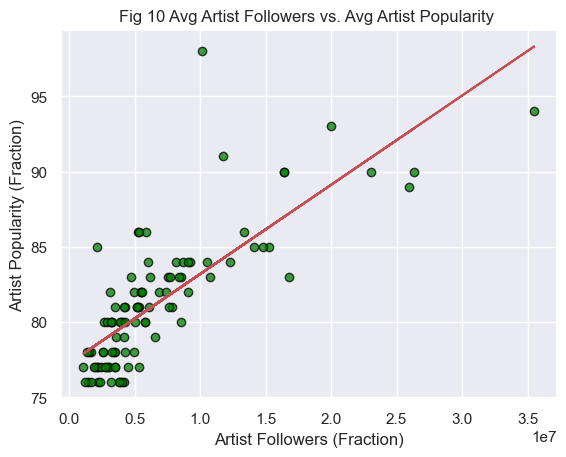

In [51]:
sns.set(color_codes=True)
#Plotting scatter chart, line curve, line equation
followers_popularity= regression(top_100_artists["Artist_Followers"], top_100_artists["Artist_Popularity"])
plt.scatter(top_100_artists["Artist_Followers"],top_100_artists["Artist_Popularity"], marker="o",facecolor="green", edgecolor="black", alpha= 0.75)
# Plotting the regression line
plt.plot(top_100_artists["Artist_Followers"],followers_popularity[0],"r-")
#Printing the line equation
# plt.annotate(followers_popularity[1],(2.01e7,78), fontsize=15, color="red")
plt.xlabel("Artist Followers (Fraction)")
plt.ylabel("Artist Popularity (Fraction)")
plt.title("Fig 10 Avg Artist Followers vs. Avg Artist Popularity ")
#Printing r-squared factor
print(f"The r-squared is : {followers_popularity[2]}")
#saving plot as "png" file
plt.savefig("Fig10.png")
plt.show()

Artists Main Genre Analysis

In [21]:
#cleaning NaN values
genre_analysis= artist_df.dropna().copy()

In [22]:
# Grouping by "Main Genre"
grouped_genre= genre_analysis.groupby("Main Genre")
artist_by_genre = grouped_genre.agg(Artist_Count= pd.NamedAgg(column="Main Genre", aggfunc="count"), Artist_Avg_Popularity= pd.NamedAgg(column="Artist_Popularity", aggfunc="mean"),
                                   Artist_Avg_Followers= pd.NamedAgg(column="Artist_Followers", aggfunc="mean"))
#Descendig sorting by "Artist_Count"
popular_main_genre= artist_by_genre.sort_values("Artist_Count", ascending=False)
# Selecting the 20 top genres based on artist count
main_genre_popularity= popular_main_genre.head(20).copy()
main_genre_popularity["Artist_Avg_Followers"]=main_genre_popularity["Artist_Avg_Followers"]/1000
main_genre_popularity=main_genre_popularity.reset_index()
main_genre_popularity

,Main Genre,Artist_Count,Artist_Avg_Popularity,Artist_Avg_Followers
0,alternative rock,101,58.356436,814.306693
1,album rock,88,69.318182,2096.238295
2,adult standards,76,63.263158,611.142934
3,art rock,31,57.387097,336.281516
4,brill building pop,29,53.931034,223.666759
5,alternative dance,24,59.750000,532.284667
6,alternative country,24,52.083333,127.731917
7,dance pop,24,73.750000,3759.910167
8,bebop,23,53.478261,265.315739
9,alternative metal,23,67.434783,2039.678913


Generating a bar chart to compare Artists Count and Number of Followers VS Artist's Main Genre

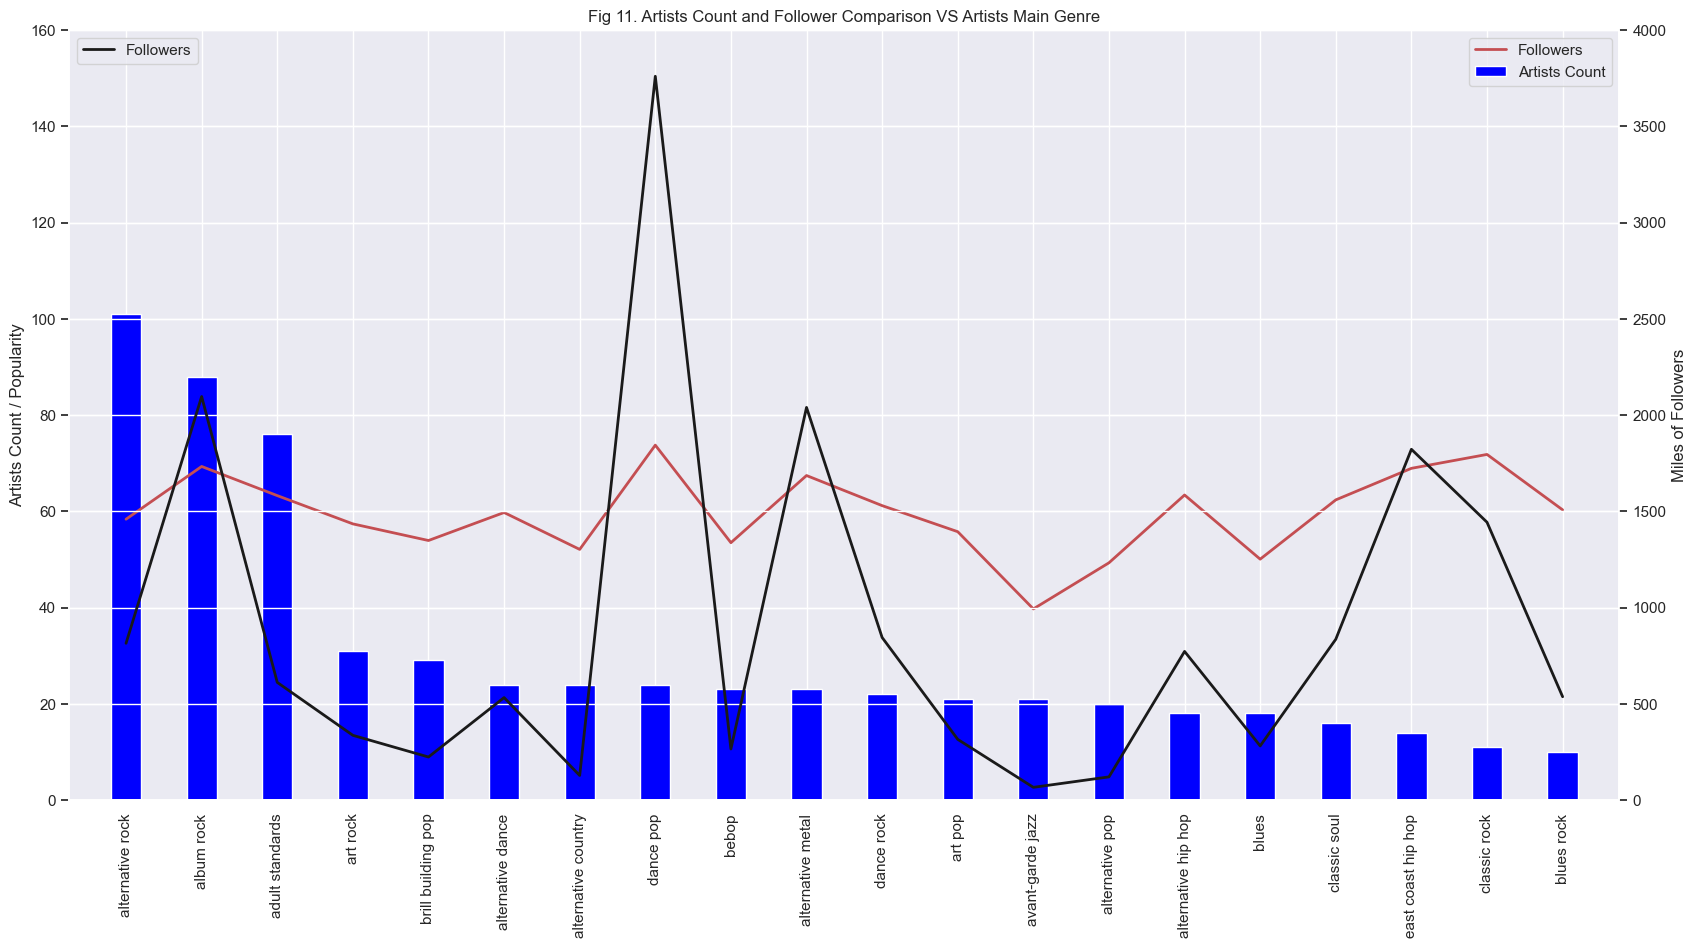

In [36]:

# Create matplotlib figure
fig = plt.figure(figsize=(20,10)) 
# Create matplotlib axes
ax = fig.add_subplot(111) 
# Create another axes that shares the same x-axis as ax.
ax2 = ax.twinx()

# Bars width
width = 0.4

#Generating bar and line plots with pandas
g1=main_genre_popularity.Artist_Count.plot(kind='bar', color='blue', ax=ax, width=width, align='center', label = 'Artists Count')
g2=main_genre_popularity.Artist_Avg_Followers.plot(color='k', ax=ax2, label='Followers', linewidth=2)
g3=main_genre_popularity.Artist_Avg_Popularity.plot(color='r',ax=ax, label='Followers', linewidth=2)
#Styling charts
x_axis= np.arange(0,20,1)
labels= (main_genre_popularity['Main Genre']).tolist()
ax.set_ylabel('Artists Count / Popularity')
ax.set_xlabel('')
ax.set_title('Fig 11. Artists Count and Follower Comparison VS Artists Main Genre')
ax2.set_ylabel('Miles of Followers')
tick_locations=[value for value in x_axis]
ax.set_xticks(tick_locations)
ax.set_xticklabels(labels,rotation=90)
ax.legend(loc="upper right")
plt.xlim(-0.75,len(x_axis)-0.25)
ax2.set_ylim(0,4000)
ax.set_ylim(0,160)
ax2.legend(loc='upper left')
plt.show()

Multiple Genres per Artist Analysis

In [24]:
# Calculating how many genres each artist has
genre_analysis["Genre Count"]= genre_analysis['Artist Genre'].str.count(',').add(1)
genre_analysis.head()

,Artist Name,Artist ID,Artist_Popularity,Artist_Followers,Artist Genre,Main Genre,Genre Count
0,The Beatles,3WrFJ7ztbogyGnTHbHJFl2,90.0,16410055.0,"beatlesque,british invasion,classic rock,merse...",beatlesque,6
1,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,84.0,8678847.0,"album rock,british invasion,classic rock,rock",album rock,4
2,Bob Dylan,74ASZWbe4lXaubB36ztrGX,79.0,4220152.0,"album rock,classic rock,country rock,folk,folk...",album rock,9
3,David Bowie,0oSGxfWSnnOXhD2fKuz2Gy,82.0,5524310.0,"album rock,art rock,classic rock,dance rock,gl...",album rock,8
4,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,82.0,9060576.0,"album rock,classic rock,hard rock,rock",album rock,4


Doing the same, but from raw data

Text(0, 0.5, 'Genre Count')

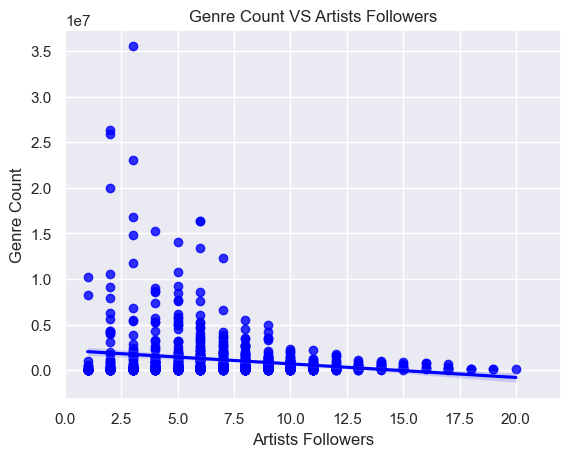

In [25]:
sns.set(color_codes=True)
sns.regplot(x="Genre Count", y="Artist_Followers", data=genre_analysis, color="blue");
plt.xlim(0,22)
plt.title("Genre Count VS Artists Followers")
plt.xlabel('Artists Followers')
plt.ylabel('Genre Count')

Text(0, 0.5, 'Genre Count')

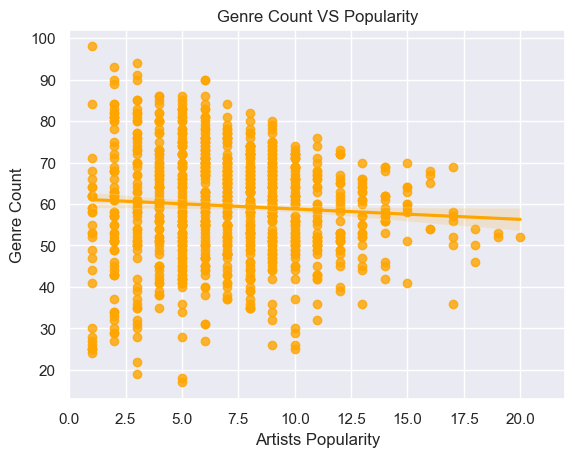

In [26]:
sns.set(color_codes=True)
sns.regplot(x="Genre Count", y="Artist_Popularity", data=genre_analysis, color="orange");
plt.xlim(0,22)
plt.title("Genre Count VS Popularity")
plt.xlabel('Artists Popularity')
plt.ylabel('Genre Count')